In [314]:
import numpy as np
import pandas as pd
import statistics
from scipy import stats

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [315]:
!CD

C:\Users\ivlevaanna\Desktop


In [316]:
dataset_facebook = pd.read_csv("C:/Users/ivlevaanna/Desktop/dataset_Facebook.csv", encoding="cp1251",sep=';' )

In [317]:
dataset_facebook.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


 Убираем все столбцы, по которым не нужно считать показатели

In [318]:
columns_to_drop  = dataset_facebook.columns[list(dataset_facebook.columns).index('Type') : list(dataset_facebook.columns).index('Lifetime Post Total Reach')]
dataset_numeric = dataset_facebook.drop(columns_to_drop, axis=1)

Для показателя Lifetime Post Total Reach отстраиваем boxplot с целью посмотреть наличие выбросов

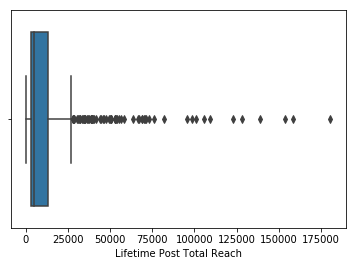

In [319]:
sns.boxplot(x='Lifetime Post Total Reach', data=dataset_numeric)

# Для каждого показателя убираем выбросы и подсчитываем необходимые значения

In [320]:
for column in dataset_numeric.columns:
    dataset_numeric[column] = dataset_numeric[column][(dataset_numeric[column]>=dataset_numeric[column].quantile(.05))&\
                (dataset_numeric[column]<=dataset_numeric[column].quantile(.95))]

Для показатедя Lifetime Post Total Reach отстраиваем boxplot повторно

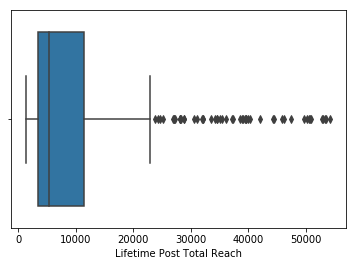

In [321]:
sns.boxplot(x='Lifetime Post Total Reach', data=dataset_numeric)

# Подсчитываем основные характеристики для всех показателей

In [322]:
dataset_numeric.agg(['mean', 'median', 'min', 'max'])

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
mean,124747.056399,10202.548889,17775.106667,794.195556,685.922222,1101.613333,10447.426667,5495.393333,525.215556,4.448421,130.590308,22.606264,160.824444
median,130791.000000,5281.000000,9051.000000,625.500000,551.500000,851.000000,6255.500000,3417.000000,412.000000,2.000000,100.500000,19.000000,123.500000
min,91009.000000,1330.000000,2453.000000,170.000000,124.000000,154.000000,1604.000000,915.000000,131.000000,0.000000,7.000000,2.000000,10.000000
max,138895.000000,54256.000000,110172.000000,2579.000000,2319.000000,4540.000000,48575.000000,22816.000000,1834.000000,25.000000,534.000000,76.000000,605.000000


 Отдельно подсчитываем моду(для некоторых показателей мод несколько)

In [323]:
dataset_numeric.mode()

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,136393.0,2232.0,4372.0,537.0,182.0,431.0,2541.0,1228.0,403.0,0.0,98.0,13.0,39.0
1,NaN,2645.0,6503.0,NaN,298.0,513.0,2888.0,1640.0,NaN,NaN,NaN,14.0,75.0
2,NaN,2938.0,7004.0,NaN,319.0,599.0,3675.0,1674.0,NaN,NaN,NaN,NaN,NaN
3,NaN,3322.0,8533.0,NaN,322.0,652.0,4911.0,1722.0,NaN,NaN,NaN,NaN,NaN
4,NaN,3358.0,8745.0,NaN,335.0,719.0,4935.0,2044.0,NaN,NaN,NaN,NaN,NaN
5,NaN,3414.0,12735.0,NaN,374.0,730.0,5010.0,2124.0,NaN,NaN,NaN,NaN,NaN
6,NaN,3528.0,NaN,NaN,482.0,795.0,5732.0,2162.0,NaN,NaN,NaN,NaN,NaN
7,NaN,3754.0,NaN,NaN,503.0,889.0,NaN,2174.0,NaN,NaN,NaN,NaN,NaN
8,NaN,5280.0,NaN,NaN,513.0,NaN,NaN,2388.0,NaN,NaN,NaN,NaN,NaN
9,NaN,5290.0,NaN,NaN,642.0,NaN,NaN,2426.0,NaN,NaN,NaN,NaN,NaN


# Аналогичным образом подсчитываем необходимые показатели и с группировкой по типам публикаций

Находим показатели с выбросами

In [324]:
dataset_facebook = pd.read_csv("C:/Users/ivlevaanna/Desktop/dataset_Facebook.csv", encoding="cp1251",sep=';' )
columns_to_drop  = dataset_facebook.columns[list(dataset_facebook.columns).index('Category') : list(dataset_facebook.columns).index('Lifetime Post Total Reach')]
dataset_numeric_type = dataset_facebook.drop(columns_to_drop, axis=1)

dataset_numeric_type.groupby('Type').agg(['mean', 'median', 'min', 'max']).T

Type                                                                Link  \
Page total likes                                   mean    116363.181818   
                                                   median  115396.000000   
                                                   min      85979.000000   
                                                   max     138895.000000   
Lifetime Post Total Reach                          mean     18544.590909   
                                                   median    7422.000000   
                                                   min       1536.000000   
                                                   max      70912.000000   
Lifetime Post Total Impressions                    mean     28725.454545   
                                                   median    9773.000000   
                                                   min       3094.000000   
                                                   max     229733.000000   
Lifetime Engaged Users                             mean       342.818182   
                                                   median     244.000000   
                                                   min         24.000000   
                                                   max       1374.000000   
Lifetime Post Consumers                            mean       292.681818   
                                                   median     205.000000   
                                                   min         23.000000   
                                                   max       1106.000000   
Lifetime Post Consumptions                         mean       374.090909   
                                                   median     290.000000   
                                                   min         26.000000   
                                                   max       1345.000000   
Lifetime Post Impressions by people who have li... mean     11148.590909   
                                                   median    9034.500000   
                                                   min       2307.000000   
                                                   max      42338.000000   
Lifetime Post reach by people who like your Page   mean      6544.363636   
                                                   median    5039.000000   
                                                   min       1180.000000   
                                                   max      27232.000000   
Lifetime People who have liked your Page and en... mean       210.545455   
                                                   median     161.500000   
                                                   min         19.000000   
                                                   max        788.000000   
comment                                            mean         2.818182   
                                                   median       1.500000   
                                                   min          0.000000   
                                                   max         15.000000   
like                                               mean        73.318182   
                                                   median      37.000000   
                                                   min          5.000000   
                                                   max        379.000000   
share                                              mean        12.909091   
                                                   median      10.500000   
                                                   min          0.000000   
                                                   max         44.000000   
Total Interactions                                 mean        89.045455   
                                                   median      52.500000   
                                                   min          6.000000   
                                                

Находим те же показатели после того, как убрали выбросы

In [325]:


for types in dataset_numeric_type['Type'].unique():
    print(types)
    data = dataset_numeric_type.loc[dataset_numeric_type['Type'] == types].drop('Type', axis = 1)
    for column in data.columns:
        data[column] = data[column][(data[column]>=data[column].quantile(.05))&(data[column]<=data[column].quantile(.95))]
    print(data.agg(['mean', 'median', 'min', 'max']))
    print('\n')
    



Photo
        Page total likes  Lifetime Post Total Reach  \
mean       123549.344648                9332.958115   
median     128032.000000                4675.000000   
min         91116.000000                1101.000000   
max        138414.000000               53456.000000   

        Lifetime Post Total Impressions  Lifetime Engaged Users  \
mean                       16470.958115              711.413613   
median                      8118.500000              605.500000   
min                         2327.000000              199.000000   
max                       110172.000000             2003.000000   

        Lifetime Post Consumers  Lifetime Post Consumptions  \
mean                 608.570681                  989.835079   
median               528.500000                  827.000000   
min                  156.000000                  224.000000   
max                 1633.000000                 3391.000000   

        Lifetime Post Impressions by people who have liked your Pa

 Отдельно подсчитываем моду(для некоторых показателей мод несколько)

In [326]:
for types in dataset_numeric_type['Type'].unique():
    print(types)
    data = dataset_numeric_type.loc[dataset_numeric_type['Type'] == types].drop('Type', axis = 1)
    for column in data.columns:
         data[column] = data[column][(data[column]>=data[column].quantile(.05))&(data[column]<=data[column].quantile(.95))]
    mode = data.mode().T
    index = mode.index
    mode = mode.values.tolist()
    for x in mode:
        print(str(index[mode.index(x)])+' '\
              +str(x).replace(', nan','').replace('[',' ').replace(']',' '))
    print('\n')

Photo
Page total likes  124940.0 
Lifetime Post Total Reach  2232.0, 2938.0, 3322.0, 3358.0, 3414.0, 3528.0, 3754.0, 5280.0, 5290.0, 9528.0, 32208.0 
Lifetime Post Total Impressions  4372.0, 6503.0, 7004.0, 8533.0, 8745.0, 12735.0 
Lifetime Engaged Users  537.0 
Lifetime Post Consumers  298.0, 319.0, 335.0, 374.0, 482.0, 503.0, 513.0, 642.0 
Lifetime Post Consumptions  431.0, 513.0, 599.0, 652.0, 719.0, 730.0, 795.0, 889.0 
Lifetime Post Impressions by people who have liked your Page  2541.0, 2888.0, 3675.0, 4911.0, 4935.0, 5010.0, 5732.0 
Lifetime Post reach by people who like your Page  1228.0, 1640.0, 1674.0, 1722.0, 2044.0, 2124.0, 2162.0, 2174.0, 2388.0, 2426.0, 2604.0, 2616.0, 2644.0, 2660.0, 2704.0, 2752.0, 2868.0, 3114.0, 3216.0, 3230.0, 3298.0, 3768.0, 5348.0, 7800.0, 20608.0 
Lifetime People who have liked your Page and engaged with your post  403.0 
comment  0.0 
like  7.0, 79.0, 98.0 
share  14.0 
Total Interactions  39.0 


Status
Page total likes  139441.0 
Lifetime Post 

# Для того, чтобы сделать вывод, какая публикация наиболее популярна, выберем метрику, для этого поделим количество уникальных пользователей, которые кликнули на пост на общий охват (Lifetime Post Consumers / Lifetime Post Total Reach)

In [327]:
dataset_facebook = pd.read_csv("C:/Users/ivlevaanna/Desktop/dataset_Facebook.csv", encoding="cp1251",sep=';' )
dataset_facebook = dataset_facebook.dropna()

<BarContainer object of 4 artists>

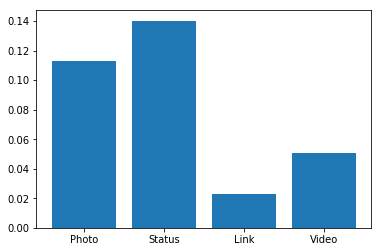

In [328]:
num = []
for types in dataset_facebook['Type'].unique():
    num.append((dataset_facebook.groupby('Type').get_group(types )['Lifetime Post Consumers']\
    /(dataset_facebook.groupby('Type').get_group(types )['Lifetime Post Total Reach'])).mean())
types = dataset_facebook['Type'].unique()
plt.bar(types, num)

In [329]:
for types in dataset_numeric_type['Type'].unique():
    print(types)
    data = dataset_numeric_type.loc[dataset_numeric_type['Type'] == types].drop('Type', axis = 1)
    for column in data.columns:
        data[column] = data[column][(data[column]>=data[column].quantile(.05))&(data[column]<=data[column].quantile(.95))]
    print(data.agg(['mean', 'median', 'min', 'max']))
    print('\n')
    

Photo
        Page total likes  Lifetime Post Total Reach  \
mean       123549.344648                9332.958115   
median     128032.000000                4675.000000   
min         91116.000000                1101.000000   
max        138414.000000               53456.000000   

        Lifetime Post Total Impressions  Lifetime Engaged Users  \
mean                       16470.958115              711.413613   
median                      8118.500000              605.500000   
min                         2327.000000              199.000000   
max                       110172.000000             2003.000000   

        Lifetime Post Consumers  Lifetime Post Consumptions  \
mean                 608.570681                  989.835079   
median               528.500000                  827.000000   
min                  156.000000                  224.000000   
max                 1633.000000                 3391.000000   

        Lifetime Post Impressions by people who have liked your Pa

<BarContainer object of 3 artists>

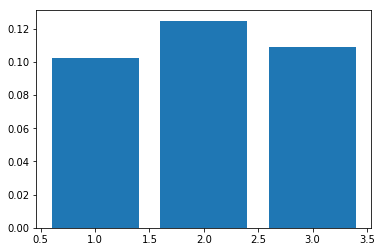

In [330]:
num = []
for types in dataset_facebook['Category'].unique():
    num.append((dataset_facebook.groupby('Category').get_group(types )['Lifetime Post Consumers']\
    /(dataset_facebook.groupby('Category').get_group(types )['Lifetime Post Total Reach'])).mean())
types = dataset_facebook['Category'].unique()
x = [int(x) for x in types]
plt.bar(x, num)

<BarContainer object of 7 artists>

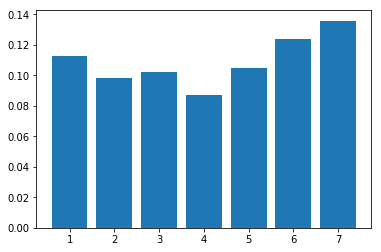

In [331]:
num = []
for types in dataset_facebook['Post Weekday'].unique():
    num.append((dataset_facebook.groupby('Post Weekday').get_group(types)['Lifetime Post Consumers']\
    /(dataset_facebook.groupby('Post Weekday').get_group(types )['Lifetime Post Total Reach'])).mean())
types = dataset_facebook['Post Weekday'].unique()
x = [x for x in types]
plt.bar(x, num)

<BarContainer object of 22 artists>

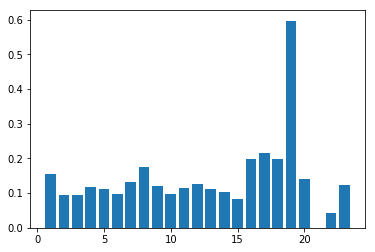

In [332]:
num = []
for types in dataset_facebook['Post Hour'].unique():
    num.append((dataset_facebook.groupby('Post Hour').get_group(types )['Lifetime Post Consumers']\
    /(dataset_facebook.groupby('Post Hour').get_group(types )['Lifetime Post Total Reach'])).mean())
types = dataset_facebook['Post Hour'].unique()
x = [x for x in types]
plt.bar(x, num)

<BarContainer object of 2 artists>

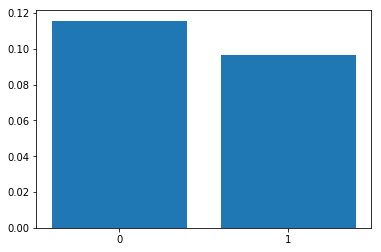

In [333]:
num = []
for types in dataset_facebook['Paid'].unique():
    num.append((dataset_facebook.groupby('Paid').get_group(types )['Lifetime Post Consumers']\
    /(dataset_facebook.groupby('Paid').get_group(types )['Lifetime Post Total Reach'])).mean())
types = dataset_facebook['Paid'].unique()
x = [str(int(x)) for x in types]
plt.bar(x, num)

  #        Таким образом, получактся, что наибольшая популярность у обьектов c типом Status, категория 2, которые опубликованы в воскресенье или понедкльник в вечернее время(16.00 - 20.00), которые не были платными

    